In [ ]:
import requests
import matplotlib.pyplot as plt

API_KEY = 'PASTE_YOUR_API_KEY_HERE'

def get_data(country):
    url = f"https://api.tradingeconomics.com/historical/country/{country}/indicator/gdp?c={API_KEY}"
    response = requests.get(url)
    return response.json()

def plot_gdp(c1, c2):
    data1 = get_data(c1)
    data2 = get_data(c2)

    years1 = [d['Date'][:4] for d in data1]
    values1 = [d['Value'] for d in data1]

    years2 = [d['Date'][:4] for d in data2]
    values2 = [d['Value'] for d in data2]

    plt.figure(figsize=(8,4))
    plt.plot(years1, values1, marker='o', label=c1)
    plt.plot(years2, values2, marker='s', label=c2)

    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('GDP Comparison – India vs China')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_gdp('india', 'china')


🔍 Requesting: https://api.tradingeconomics.com/historical/country/mexico/indicator/GDP?c=b52d974c724544f:n1621yqk02f25hz
📶 Status Code: 200
📜 Response Text (first 100 chars): [{"Country":"Mexico","Category":"GDP","DateTime":"1960-12-31T00:00:00","Value":13.0400,"Frequency":"
✅ Got 65 records.


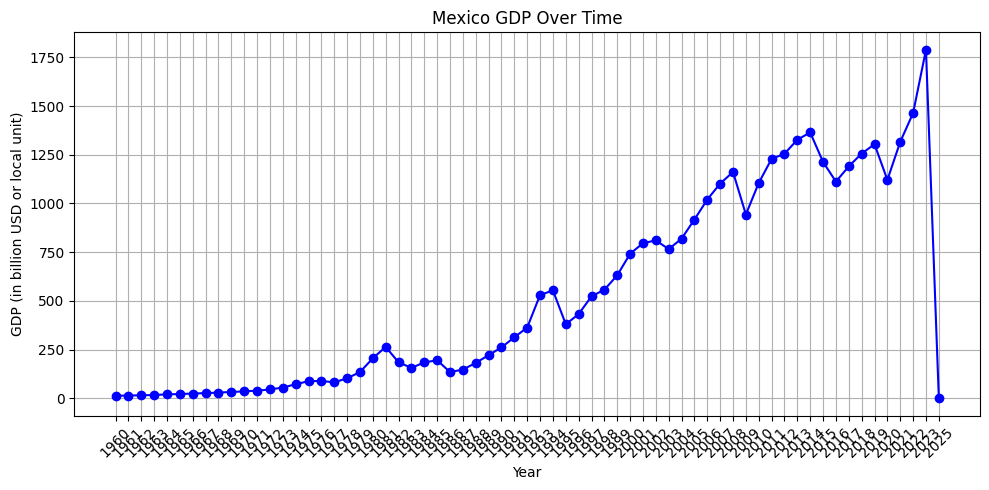

In [38]:
import requests
import matplotlib.pyplot as plt

API_KEY = 'b52d974c724544f:n1621yqk02f25hz'

def fetch_indicator(country, indicator):
    indicator_clean = indicator.replace(" ", "%20")
    url = f"https://api.tradingeconomics.com/historical/country/{country}/indicator/{indicator_clean}?c={API_KEY}"

    print(f"\n🔍 Requesting: {url}")
    response = requests.get(url)
    print("📶 Status Code:", response.status_code)
    print("📜 Response Text (first 100 chars):", response.text[:100])

    try:
        data = response.json()
        if isinstance(data, list) and len(data) > 0 and 'DateTime' in data[0]:
            print(f"✅ Got {len(data)} records.")
            return data
        else:
            print("⚠️ No valid data found.")
            return []
    except Exception as e:
        print("❌ JSON Decode Error:", e)
        return []

def plot_gdp(country):
    data = fetch_indicator(country, "GDP")
    if not data:
        return

    # Sort by date
    data.sort(key=lambda x: x['DateTime'])

    years = [d['DateTime'][:4] for d in data]
    values = [d['Value'] for d in data]

    plt.figure(figsize=(10, 5))
    plt.plot(years, values, marker='o', linestyle='-', color='blue')
    plt.title(f"{country.capitalize()} GDP Over Time")
    plt.xlabel("Year")
    plt.ylabel("GDP (in billion USD or local unit)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 🔁 Run for Mexico
plot_gdp("mexico")
